<a href="https://colab.research.google.com/github/visheshta-developer/Data-Science-Assignment-1/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /content


In [ ]:
print("Files in this directory:", os.listdir())

Files in this directory: ['.config', 'train_dataset_final1.csv', 'validate_dataset_final.csv', 'sample_data']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [ ]:
train_df = pd.read_csv('train_dataset_final1.csv')
validation_df = pd.read_csv('validate_dataset_final.csv')

In [ ]:
train_df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [ ]:
validation_df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


In [ ]:
train_df.shape

(25247, 27)

In [ ]:
train_df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [ ]:
train_df['age'].fillna(train_df['age'].median , inplace = True)


<ipython-input-12-908453a3f62f>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0        25.0
1        24.0
2        63.0
3        43.0
4        32.0
         ... 
25242    33.0
25243    49.0
25244    31.0
25245    40.0
25246    58.0
Name: age, Length: 25247, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_df['age'].fillna(train_df['age'].median , inplace = True)


In [ ]:
train_df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [ ]:
train_df['marriage'] = train_df['marriage'].astype('category')
train_df['sex'] = train_df['sex'].astype('category')
train_df['education'] = train_df['education'].astype('category')

In [ ]:
train_df.dtypes

,0
Customer_ID,int64
marriage,category
sex,category
education,category
LIMIT_BAL,int64
age,object
pay_0,int64
pay_2,int64
pay_3,int64
pay_4,int64


In [ ]:
for k in range(1, 8):
    if(k==2):
      train_df[f'delinquent_{k}'] = 0
    else:
      train_df[f'delinquent_{k}'] = np.where(train_df[f'pay_{k-1}'] >= 1, 1, 0)

In [ ]:
train_df

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,delinquent_1,delinquent_2,delinquent_3,delinquent_4,delinquent_5,delinquent_6,delinquent_7
0,5017,2,0,2,60000,25.0,2,2,2,0,...,41511.50,0.03,0,1,0,1,1,0,0,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,2534.50,0.27,0,0,0,0,0,0,0,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,50422.00,0.04,0,0,0,0,0,0,0,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,86229.50,0.04,0,0,0,0,0,0,0,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,11814.33,0.72,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,82312.50,0.05,0,0,0,0,0,0,1,1
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,41371.67,0.14,1,0,0,0,0,0,0,0
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,3071.83,1.31,1,0,0,0,0,0,0,0
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,197278.83,0.03,0,0,0,0,0,0,0,0


In [ ]:
train_df['LIMIT_BAL'].replace(0,1)
train_df['AVG_Bill_amt'].replace(0,1)
train_df['credit_utilization'] = train_df['AVG_Bill_amt'] / train_df['LIMIT_BAL']

In [ ]:
train_df['Total_pay'] = train_df[['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']].sum(axis=1).astype('int').replace(0,1)
train_df['Total_bill'] = train_df[['Bill_amt1','Bill_amt2','Bill_amt3','Bill_amt4','Bill_amt5','Bill_amt6']].sum(axis=1).astype('int').replace(0,1)

In [ ]:
train_df['payment_ratio'] = train_df['Total_pay'] / train_df['Total_bill']

In [ ]:
train_df.head(10)

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,delinquent_2,delinquent_3,delinquent_4,delinquent_5,delinquent_6,delinquent_7,credit_utilization,Total_pay,Total_bill,payment_ratio
0,5017,2,0,2,60000,25.0,2,2,2,0,...,0,1,1,0,0,0,0.691858,7957,249068,0.031947
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,0,0,0,0,0,0,0.008740,4049,15210,0.266206
2,5019,1,0,2,180000,63.0,0,0,0,0,...,0,0,0,0,0,0,0.280122,12055,302530,0.039847
3,5020,1,1,2,210000,43.0,0,0,0,0,...,0,0,0,0,0,0,0.410617,18449,517378,0.035659
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,0,0,0,0,0,0,0.042194,51314,70885,0.723905
5,5022,1,1,1,80000,35.0,-1,2,-1,-1,...,0,1,0,0,0,0,0.024331,9657,11677,0.827010
6,5023,1,0,2,200000,37.0,-1,-1,0,-1,...,0,0,0,0,0,0,0.075927,74218,91114,0.814562
7,5024,3,1,2,50000,24.0,0,0,0,0,...,0,0,0,0,0,0,0.421107,15472,126332,0.122471
8,5025,1,1,3,50000,44.0,0,0,0,0,...,0,0,0,0,0,0,0.700793,16398,210239,0.077997
9,5026,2,1,1,440000,<bound method Series.median of 0 25.0\n...,0,-1,-1,-2,...,0,0,0,0,0,0,0.021748,20910,57415,0.364191


In [ ]:
numeric_cols = train_df.select_dtypes(include=np.number).columns
median_values = train_df[numeric_cols].median()

train_df.fillna(median_values, inplace=True)

print(train_df.isnull().sum())

Customer_ID           0
marriage              0
sex                   0
education             0
LIMIT_BAL             0
age                   0
pay_0                 0
pay_2                 0
pay_3                 0
pay_4                 0
pay_5                 0
pay_6                 0
Bill_amt1             0
Bill_amt2             0
Bill_amt3             0
Bill_amt4             0
Bill_amt5             0
Bill_amt6             0
pay_amt1              0
pay_amt2              0
pay_amt3              0
pay_amt4              0
pay_amt5              0
pay_amt6              0
AVG_Bill_amt          0
PAY_TO_BILL_ratio     0
next_month_default    0
delinquent_1          0
delinquent_2          0
delinquent_3          0
delinquent_4          0
delinquent_5          0
delinquent_6          0
delinquent_7          0
credit_utilization    0
Total_pay             0
Total_bill            0
payment_ratio         0
dtype: int64


In [ ]:
train_data = train_df.drop(['Customer_ID'], axis=1)
valid_data = validation_df.drop(['Customer_ID'], axis=1)
X = train_df.drop('next_month_default', axis=1)
y = train_df['next_month_default']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
infinite_values = train_df.isin([np.inf, -np.inf])
print("Number of infinite values per column:")
print(infinite_values.sum())

Number of infinite values per column:
Customer_ID           0
marriage              0
sex                   0
education             0
LIMIT_BAL             0
age                   0
pay_0                 0
pay_2                 0
pay_3                 0
pay_4                 0
pay_5                 0
pay_6                 0
Bill_amt1             0
Bill_amt2             0
Bill_amt3             0
Bill_amt4             0
Bill_amt5             0
Bill_amt6             0
pay_amt1              0
pay_amt2              0
pay_amt3              0
pay_amt4              0
pay_amt5              0
pay_amt6              0
AVG_Bill_amt          0
PAY_TO_BILL_ratio     0
next_month_default    0
delinquent_1          0
delinquent_2          0
delinquent_3          0
delinquent_4          0
delinquent_5          0
delinquent_6          0
delinquent_7          0
credit_utilization    0
Total_pay             0
Total_bill            0
payment_ratio         0
dtype: int64


In [ ]:
X = train_df.drop(['Customer_ID', 'next_month_default'], axis=1)
y = train_df['next_month_default']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42,sampling_strategy='minority')

In [ ]:
model = RandomForestClassifier(class_weight={0:1, 1:5}, random_state=42)

In [ ]:
train_df_majority = train_df[train_df['next_month_default'] == 0]
df_minority = train_df[train_df['next_month_default'] == 1]
from sklearn.utils import resample

df_majority_downsampled = resample(train_df_majority,
                                 replace=False,    # without replacement
                                 n_samples=len(df_minority), # to match minority
                                 random_state=42)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

## **Exploratory and Financial Analysis for Credit Card Default Risk**

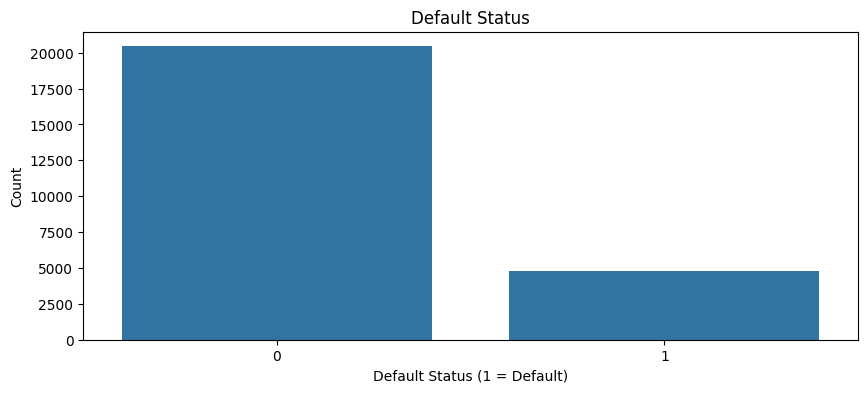

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='next_month_default', data=train_df)
plt.title('Default Status')
plt.xlabel('Default Status (1 = Default)')
plt.ylabel('Count')
plt.show()

In [ ]:
default_rate = train_df['next_month_default'].mean()
print((default_rate)*100, '%')

19.039885927040835 %


In [ ]:
train_df['age'] = pd.to_numeric(train_df['age'], errors='coerce')
train_df['age'].fillna(train_df['age'].median(), inplace=True)
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
train_df['AGE_GROUP'] = pd.cut(train_df['age'], bins=bins, labels=labels)

<ipython-input-30-998118539cc4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['age'].fillna(train_df['age'].median(), inplace=True)


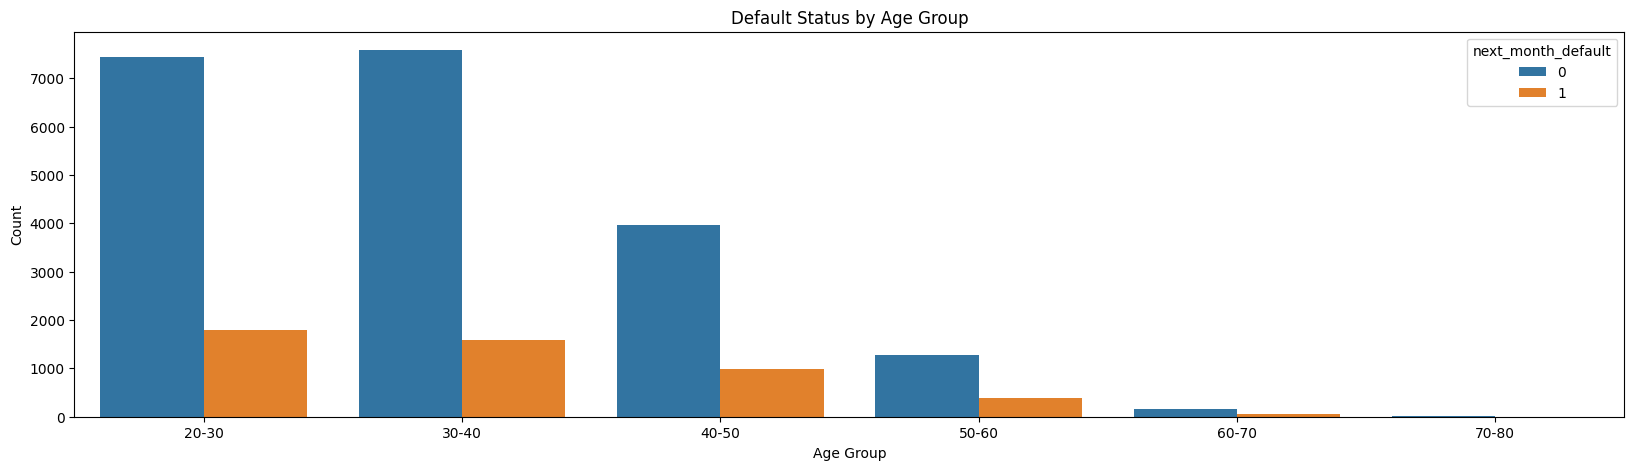

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='AGE_GROUP', hue='next_month_default', data=train_df)
plt.title('Default Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

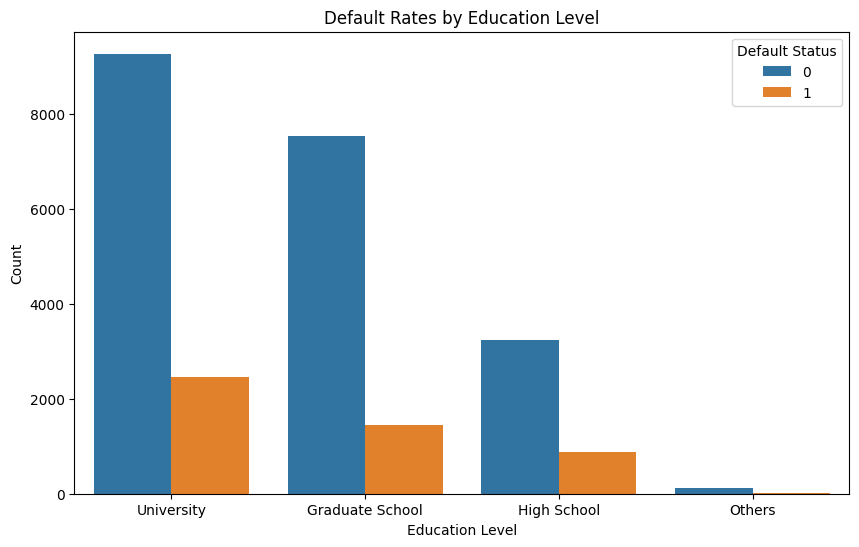

In [ ]:
education_labels = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others'
}
train_df['education_label'] = train_df['education'].map(education_labels)

plt.figure(figsize=(10, 6))
sns.countplot(x='education_label', hue='next_month_default', data=train_df)
plt.title('Default Rates by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Default Status')
plt.show()

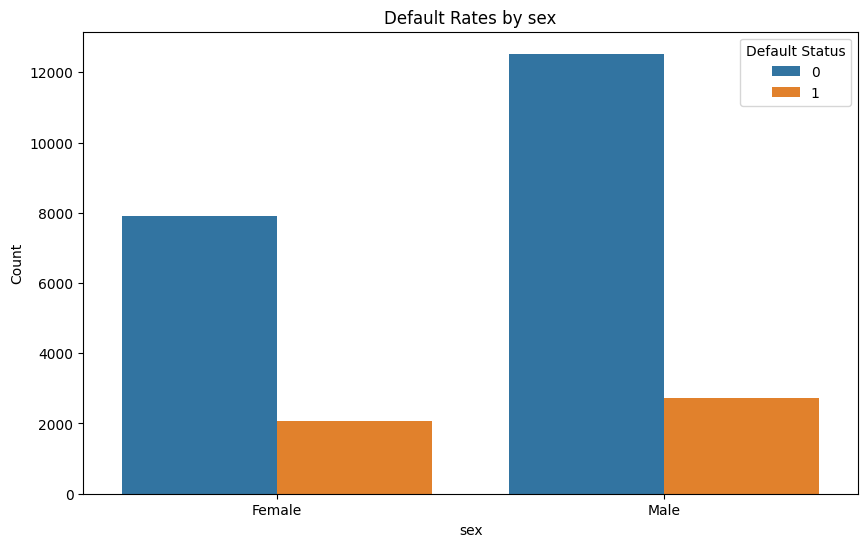

In [ ]:
sex_labels = {
    0: 'Female',
    1: 'Male'
}
train_df['sex_label'] = train_df['sex'].map(sex_labels)

plt.figure(figsize=(10, 6))
sns.countplot(x='sex_label', hue='next_month_default', data=train_df)
plt.title('Default Rates by sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.legend(title='Default Status')
plt.show()

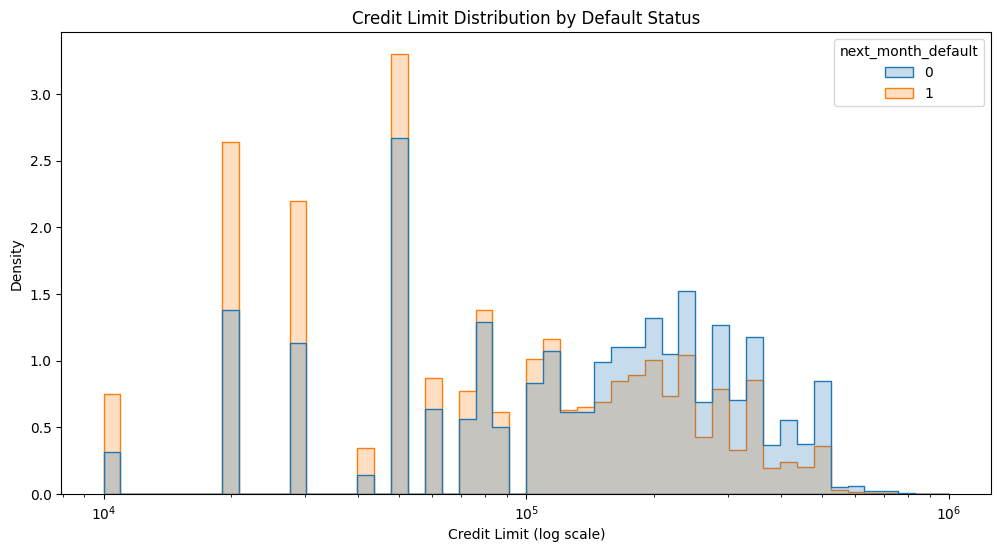

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='LIMIT_BAL', hue='next_month_default', log_scale=True, bins=50, element='step', stat='density', common_norm=False)
plt.title('Credit Limit Distribution by Default Status')
plt.xlabel('Credit Limit (log scale)')
plt.ylabel('Density')
plt.show()

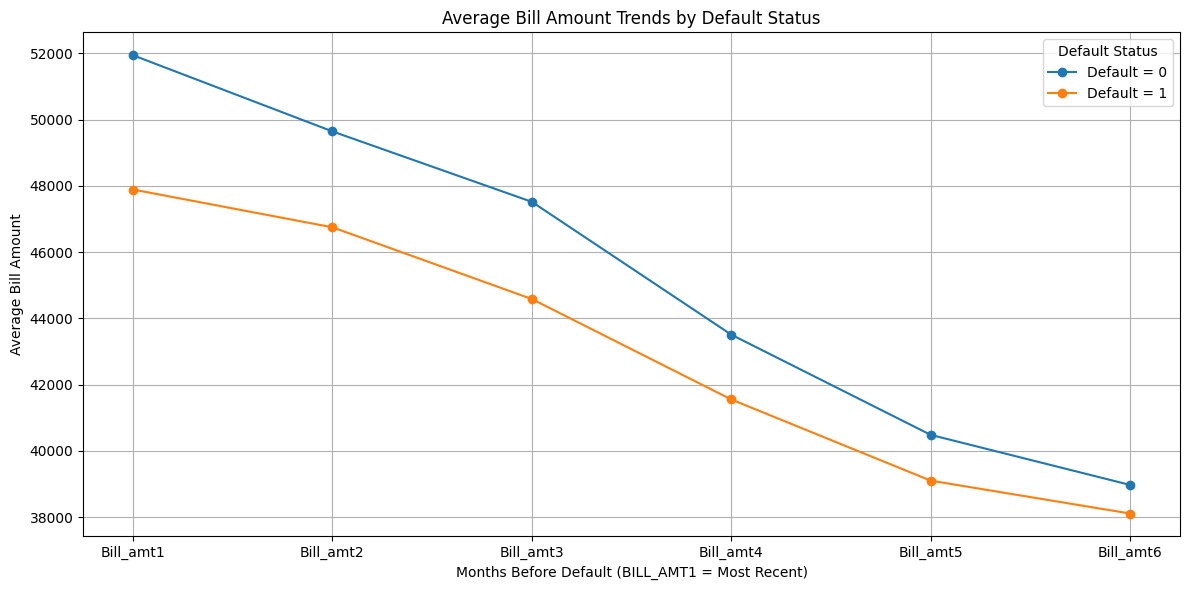

In [ ]:
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]

bill_amt = train_df.groupby('next_month_default')[bill_cols].mean()

plt.figure(figsize=(12, 6))
for status in [0, 1]:
    plt.plot(bill_cols, bill_amt.loc[status],
             label=f'Default = {status}',
             marker='o')

plt.title('Average Bill Amount Trends by Default Status')
plt.xlabel('Months Before Default (BILL_AMT1 = Most Recent)')
plt.ylabel('Average Bill Amount')
plt.legend(title='Default Status')
plt.grid(True)
plt.tight_layout()
plt.show()

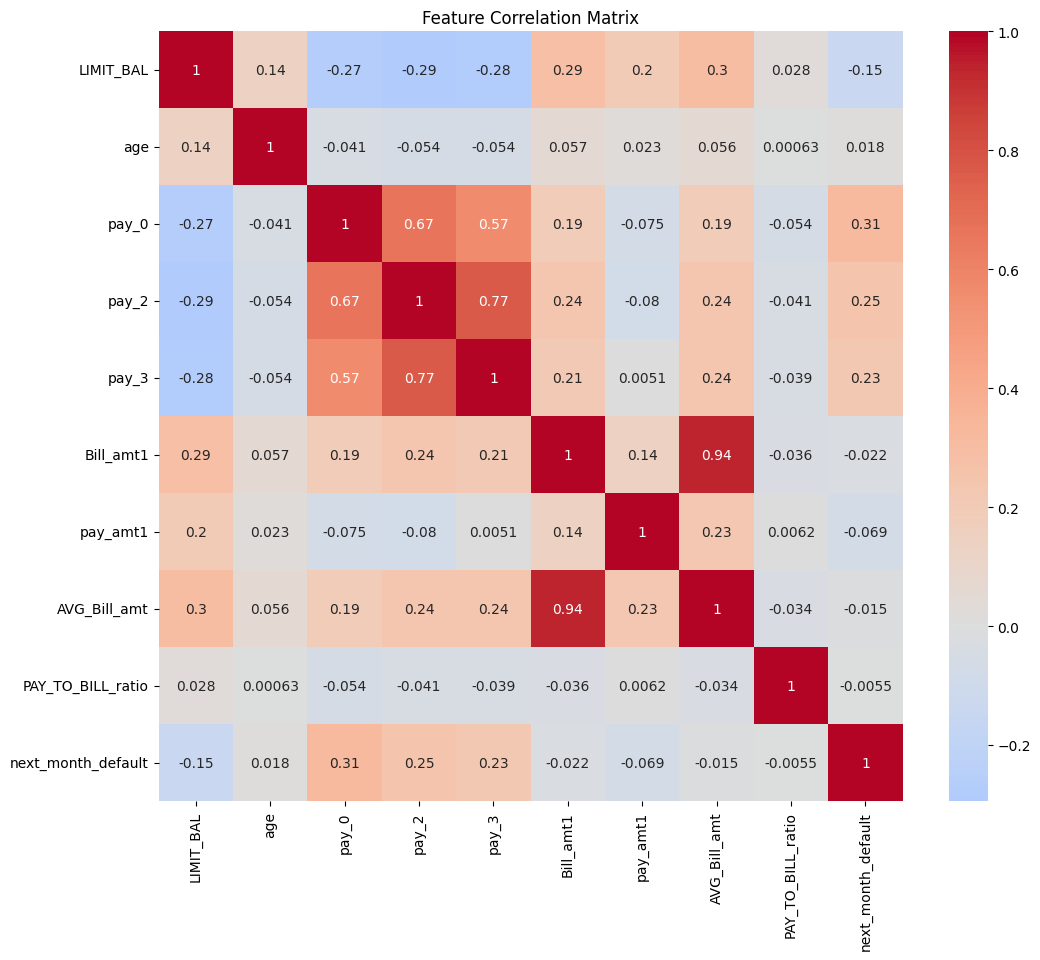

In [ ]:
features = ['LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3',
            'Bill_amt1', 'pay_amt1', 'AVG_Bill_amt',
            'PAY_TO_BILL_ratio', 'next_month_default']

plt.figure(figsize=(12, 10))
corr = train_df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

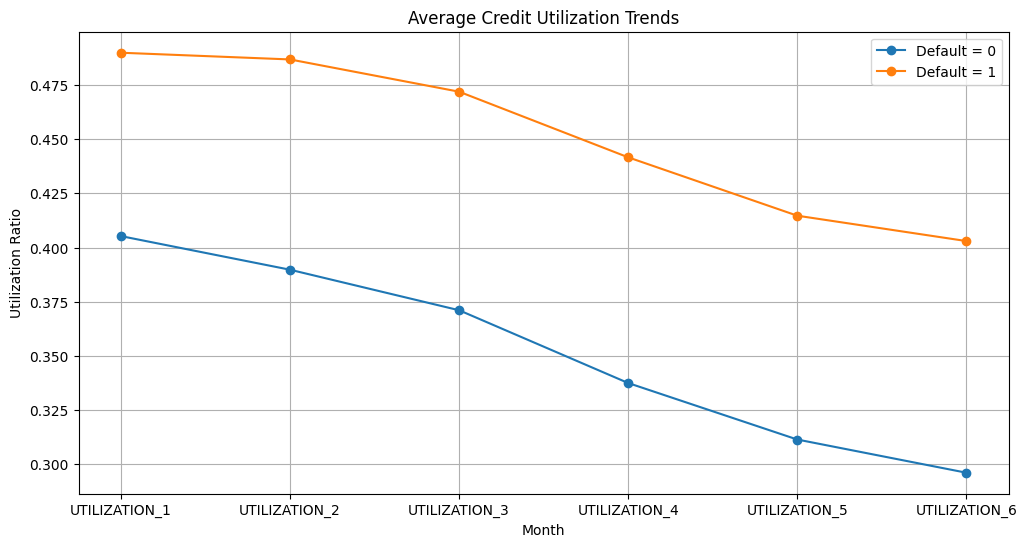

In [ ]:
for i in range(1, 7):
    train_df[f'UTILIZATION_{i}'] = train_df[f'Bill_amt{i}'] / train_df['LIMIT_BAL']

util_cols = [f'UTILIZATION_{i}' for i in range(1, 7)]
util = train_df.groupby('next_month_default')[util_cols].mean()

plt.figure(figsize=(12, 6))
for status in [0, 1]:
    plt.plot(util_cols, util.loc[status],
             label=f"Default = {status}",
             marker='o')
plt.title('Average Credit Utilization Trends')
plt.xlabel('Month')
plt.ylabel('Utilization Ratio')
plt.legend()
plt.grid()
plt.show()

            LIMIT_BAL           age   AVG_Bill_amt  PAY_TO_BILL_ratio
count    25247.000000  25247.000000   25247.000000       25247.000000
mean    168342.060443     35.431022   44859.647485           0.362962
std     129892.784807      9.152635   62819.226119           5.047206
min      10000.000000     21.000000  -56043.170000        -546.930000
25%      50000.000000     28.000000    4858.670000           0.040000
50%     140000.000000     34.000000   21102.830000           0.090000
75%     240000.000000     41.000000   57136.580000           0.590000
max    1000000.000000     79.000000  877313.830000         205.380000


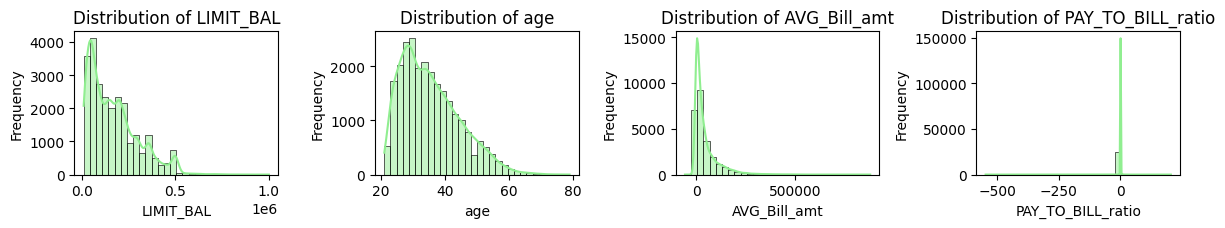

In [ ]:
key_features = ['LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']

stats = train_df[key_features].describe()
print(stats)


plt.figure(figsize=(12, 8))
for k, col in enumerate(key_features):
    plt.subplot(4, 4, k + 1)
    sns.histplot(train_df[col], kde=True, bins=30, color='lightgreen')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

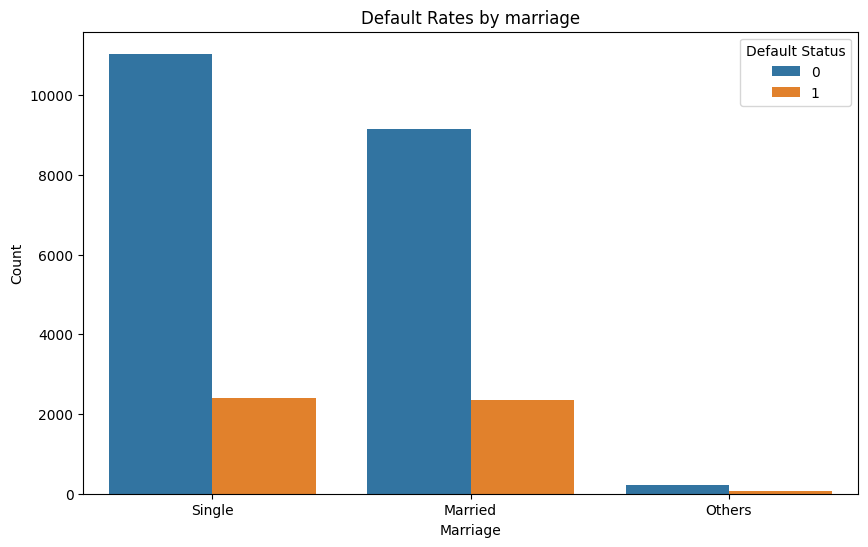

In [ ]:
Marriage_status = {
    1: 'Married',
    2: 'Single',
    3: 'Others'
    }
train_df['Marriage_status'] = train_df['marriage'].map(Marriage_status)

plt.figure(figsize=(10, 6))
sns.countplot(x='Marriage_status', hue='next_month_default', data=train_df)
plt.title('Default Rates by marriage')
plt.xlabel('Marriage')
plt.ylabel('Count')
plt.legend(title='Default Status')
plt.show()

# **●	Go beyond basic EDA — analyze behavioral trends like payment delays, repayment consistency, and utilization**

### **●	Engineer features and transformations that are financially meaningful and predictive like credit utilization ratio, delinquency streaks etc.**

In [ ]:
#doing this step to maintain continuity as given in ps
for i in range(1,7):
  train_df[f'credit_utilization_ratio{i}'] = train_df[f'Bill_amt{i}'] / train_df['LIMIT_BAL']
for i in range(1, 7):
  train_df[f'pay_ratio_{i}'] = train_df[f'pay_amt{i}'] / (train_df[f'Bill_amt{i}'] + 0.1)
train_df['avg_utilization'] = train_df[[f'credit_utilization_ratio{i}' for i in range(1, 7)]].mean(axis=1)



In [ ]:
# Count of late payments (status > 0 means late)

pay_cols = ['pay_0' , 'pay_2' , 'pay_3' , 'pay_4' , 'pay_5' , 'pay_6']
train_df['total_late_payments'] = (train_df[pay_cols] > 0).sum(axis=1)

# Max delinquency severity
train_df['max_delinquency'] = train_df[pay_cols].max(axis=1)

# Current delinquency streak
def get_current_streak(row):
    streak = 0
    for i in pay_cols:  # Check PAY_0 first (most recent)
        if row[f'{i}'] > 0:
            streak += 1
        else:
            break
    return streak

train_df['current_delinquency_streak'] = train_df.apply(get_current_streak, axis=1)
train_df

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,pay_ratio_1,pay_ratio_2,pay_ratio_3,pay_ratio_4,pay_ratio_5,pay_ratio_6,avg_utilization,total_late_payments,max_delinquency,current_delinquency_streak
0,5017,2,0,2,60000,25.0,2,2,2,0,...,0.033158,0.000000,0.020096,0.063694,0.067594,0.072298,0.691858,3,2,3
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,0.000000,1.700000,0.000000,3600.133333,0.000000,0.999496,0.008742,0,0,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,0.043540,0.044969,0.036888,0.039417,0.037050,0.037738,0.280120,0,0,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,0.036730,0.036387,0.037511,0.031467,0.034122,0.037586,0.410618,0,0,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,0.050837,3.189013,14.130441,0.046739,0.000005,0.186207,0.042194,0,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,0.037112,0.052359,0.101052,0.062987,0.042085,0.034740,0.914589,2,2,0
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,0.369260,0.032757,0.038181,0.142109,0.205577,0.135607,0.689526,0,0,0
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,1.000068,1.000061,0.405193,7.720593,2.389545,0.721943,0.025597,0,-1,0
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,0.039021,0.028402,0.028009,0.028232,0.029891,0.034260,0.505842,0,0,0


In [ ]:
# Count of months with only minimum payment (status = 0)
pay_cols = ['pay_0' , 'pay_2' , 'pay_3' , 'pay_4' , 'pay_5' , 'pay_6']
train_df['min_payment_months'] = (train_df[pay_cols] == 0).sum(axis=1)

# Count of months with full payment (status < 0)
train_df['full_payment_months'] = (train_df[pay_cols] < 0).sum(axis=1)

# Count of months with delayed payment (status > 0)
train_df['delayed_months'] = (train_df[pay_cols] > 0).sum(axis=1)

# Payment consistency
pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]
train_df['payment_consistency'] = train_df[pay_amt_cols].std(axis=1)
train_df

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,pay_ratio_5,pay_ratio_6,avg_utilization,total_late_payments,max_delinquency,current_delinquency_streak,min_payment_months,full_payment_months,delayed_months,payment_consistency
0,5017,2,0,2,60000,25.0,2,2,2,0,...,0.067594,0.072298,0.691858,3,2,3,3,0,3,714.956931
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,0.000000,0.999496,0.008742,0,0,0,3,3,0,1129.473118
2,5019,1,0,2,180000,63.0,0,0,0,0,...,0.037050,0.037738,0.280120,0,0,0,6,0,0,123.925072
3,5020,1,1,2,210000,43.0,0,0,0,0,...,0.034122,0.037586,0.410618,0,0,0,6,0,0,337.634028
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,0.000005,0.186207,0.042194,0,-2,0,0,6,0,17912.037141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,0.042085,0.034740,0.914589,2,2,0,4,0,2,1930.339559
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,0.205577,0.135607,0.689526,0,0,0,6,0,0,7879.765467
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,2.389545,0.721943,0.025597,0,-1,0,0,6,0,3743.889877
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,0.029891,0.034260,0.505842,0,0,0,6,0,0,863.822720


In [ ]:
# Approax risk score base on the above features
train_df['simple_risk_score'] = (
    train_df['total_late_payments'] * 2 +
    train_df['current_delinquency_streak'] * 3 +
    (train_df['avg_utilization'] > 0.8).astype(int) * 2
)

train_df['risk_category'] = pd.cut(train_df['simple_risk_score'],
                            bins=[-1, 3, 7, 15, 100],
                            labels=['Low', 'Medium', 'High', 'Very High'])
train_df

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,avg_utilization,total_late_payments,max_delinquency,current_delinquency_streak,min_payment_months,full_payment_months,delayed_months,payment_consistency,simple_risk_score,risk_category
0,5017,2,0,2,60000,25.0,2,2,2,0,...,0.691858,3,2,3,3,0,3,714.956931,15,High
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,0.008742,0,0,0,3,3,0,1129.473118,0,Low
2,5019,1,0,2,180000,63.0,0,0,0,0,...,0.280120,0,0,0,6,0,0,123.925072,0,Low
3,5020,1,1,2,210000,43.0,0,0,0,0,...,0.410618,0,0,0,6,0,0,337.634028,0,Low
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,0.042194,0,-2,0,0,6,0,17912.037141,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,0.914589,2,2,0,4,0,2,1930.339559,6,Medium
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,0.689526,0,0,0,6,0,0,7879.765467,0,Low
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,0.025597,0,-1,0,0,6,0,3743.889877,0,Low
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,0.505842,0,0,0,6,0,0,863.822720,0,Low


# ●	Test and compare multiple classification models such as:
  - Logistic Regression
  - Decision Trees
  - Ensemble Methods (e.g., XGBoost, LightGBM)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
#there is no need of customer if for testing
train_data = train_df.drop(['Customer_ID'], axis=1)
valid_data = validation_df.drop(['Customer_ID'], axis=1)

#next month default column is our target column
all_features = [col for col in train_df.columns if col not in ['Customer_ID', 'next_month_default']]

X = train_df[all_features]
y = train_df['next_month_default']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Model Implementation to check which one is best
# 1.LogisticRegression
from sklearn.impute import KNNImputer

# K-Nearest Neighbors imputation
imputer = KNNImputer(n_neighbors=5)

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = LogisticRegression(max_iter=2000)
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [ ]:
from xgboost import XGBClassifier

xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(XGBClassifier(), xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0]
}

lgbm_grid = GridSearchCV(LGBMClassifier(), lgbm_params, cv=5, scoring='accuracy')
lgbm_grid.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

models = {
    'Logistic Regression': lr_grid.best_estimator_,
    'Decision Tree': dt_grid.best_estimator_,
    'XGBoost': xgb_grid.best_estimator_,
    'LightGBM': lgbm_grid.best_estimator_
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0]*len(y_test)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba) if hasattr(model, "predict_proba") else None,
        'Best Params': model.get_params() if name != 'Logistic Regression' else model.named_steps['classifier'].get_params()
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1 Score', ascending=False))